# Loading a 3D Earth Model

Using 
- **accessvis** (a library for plotting earth systems data in 3D), and
- **lavavu** a python 3D graphics library (via interface to OpenGL) and video renderer (via interface to FFMpeg / libavcodec)

In [1]:
import sys
import accessvis
import lavavu
import numpy as np
import math
import os

## Select our model resolution

This widget gives a quick way of choosing the level of detail to load, lower detail is faster and uses less memory but doesn't look as good, higher levels will be so slow to render that it will be difficult to interact with the model, best left for final renders.

The default parameter sets the initial choice [1-4]

In [2]:
accessvis.resolution_selection(default=1)

Low-res 2K - fast for testing
Mid-res 4K - good enough for full earth views
High res 8K - better if showing close up at country scale
Ultra-high 16K - max detail but requires a fast GPU with high memory


Dropdown(description='Detail:', options=(('Low-res 2K', 1), ('Mid-res 4K', 2), ('High-res 8K', 3), ('Ultra-hig…

## Create a simple earth relief plot

- Disabling lighting for now so we can enable it later
- Using relief textures, less detail and less realistic than satellite data but also less distraction from data plotted
- Setting a white background
- 20 times vertical exaggeration of topography

In [3]:
lv = accessvis.plot_earth(lighting=False, texture='relief', background="white", vertical_exaggeration=20)

/home/okaluza/ACCESS-NRI/visualisations/src/accessvis/data


### Display
Outputs an image inline in the notebook, pass desired pixel resolution (width,height)


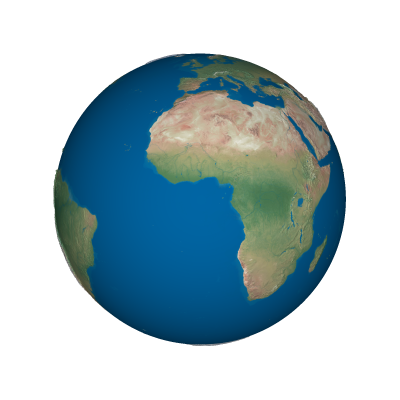

In [4]:
lv.display((400,400))

## Basic camera functions

There is a very simple camera controlled by translation and rotation of the model

render() renders a frame without outputting anything to the notebook, useful for creating animations or just applying any changes.

To get the current frame in the notebook, use display() as above. To save an image to disk, use image(), as below.


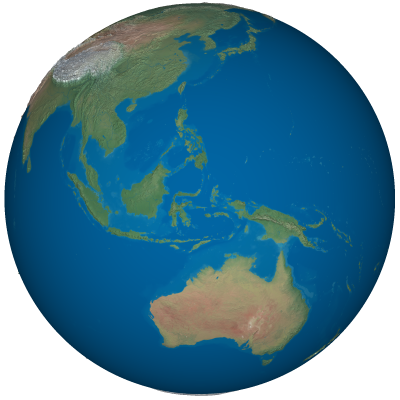

In [5]:
#Set zoom by translating z axis
lv.translation(0.0, 0.0, -17)

#Rotate to Australia, -125° around y axis
lv.rotation(0.0, -125.0, 0.0)

lv.display((400,400))

### Image output

- render() renders a frame without outputting anything to the notebook, useful for creating animations or just applying any changes
- display() as mentioned above, gets the current frame in the notebook
- image() saves an image to disk at desired resolution

In [6]:
lv.image("earth.jpg", (100,100))

'earth.jpg'

### Displaying a previously saved image

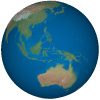

In [7]:
from IPython.display import Image
Image(filename='earth.jpg') 

## Change some lighting and display properties

The default light follows the camera so any movement of the model will move the light so it is always shining from the camera view direction
This can be changed to a fixed light.

The lighting properties can be set to change the type of lighting effect:
diffuse: directional diffuse light, brightens the area where the light is hitting the scene but softly without highlights, makes model appear more 3d
- ambient: background light level, increasing this brightens the whole scene but makes it appear more flat as it is not directional
- specular: shows a bright highlight where the light hits the scene, increasing will make the model surface stand out more and appear shinier
- shininess: level of shininess of the surface for specular lighting above, reduce this for a less focused, larger specular highlight, increase for a smaller and more intense shininess effect
- light: colour of the light R,G,B in range [0,1]


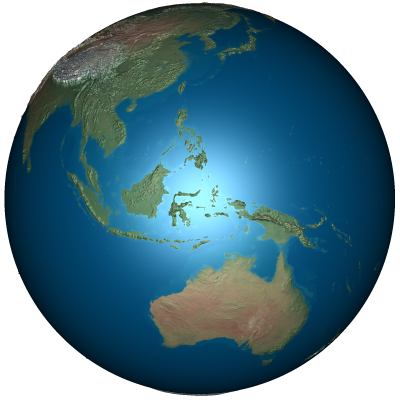

In [8]:
lv.set_properties(diffuse=0.8, ambient=0.1, specular=0.35, shininess=0.03, light=[1,1,0.98])
lv.display((400,400))

## Quick adjustment of output image visual properties

There is a shortcut function to set the brightness, contrast and saturation values in the range [0,1] where the default/normal settings are 0.5
- brightness : make the scene lighter (-> 1) or darker (-> 0)
- contrast : increase or reduce the difference between bright and dark areas
- saturation : increase or reduce the colour saturation from greyscale (0) to maximum saturation (1)

In [9]:
#Increase the colour saturation a bit
lv.brightness_contrast_saturation(0.5, 0.5, 0.65)


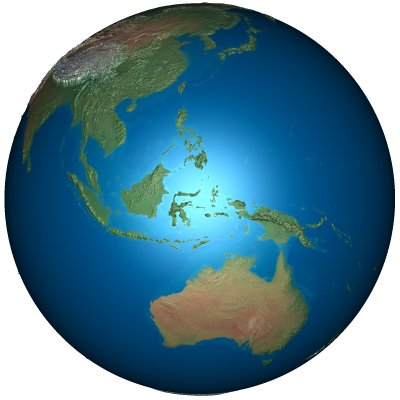

In [10]:
lv.display((400,400))

### Change ocean colour, enable waves

In [12]:
accessvis.update_earth_values(lv, ocean=[0.0, 0.2, 0.4, 1.0], waves=True)


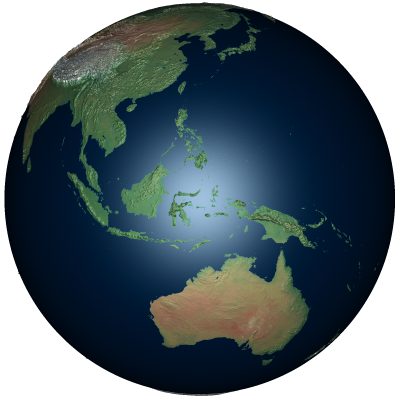

In [13]:
lv.display((400,400))

## More camera functions

- reset() - restores default view, no rotation, auto calculated zoom
- camera() - output / save / restore camera position

In [14]:
lv.reset() #Zero the view

In [15]:
cam = lv.camera() #Get current view

lv.translation(0.0, 0.0, -22.072)
lv.rotation(0.0, 0.0, 0.0)


In [16]:
#Set saved viewpoint from rotation and translation
lv.translation(0.441, -1.034, -10.877)
lv.rotation(-134.765, -33.427, 157.365)


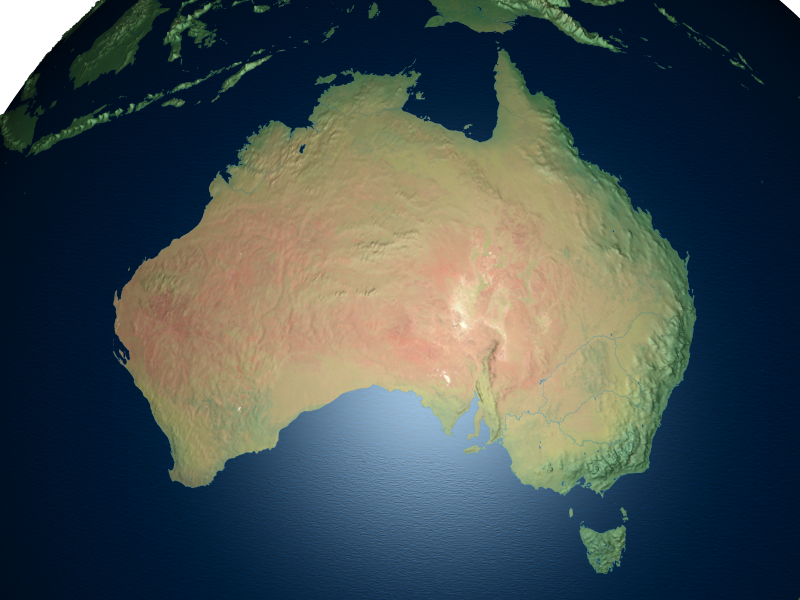

In [17]:
lv.display((800,600))

In [18]:
#Set from saved cam object
lv.camera(cam)

lv.translation(0.441, -1.034, -10.877)
lv.rotation(-134.765, -33.427, 157.365)


{'translate': [0.441, -1.034, -10.877],
 'rotate': [-0.065, -0.889, 0.309, 0.333],
 'xyzrotate': [-134.765, -33.427, 157.365],
 'fov': 45.0}


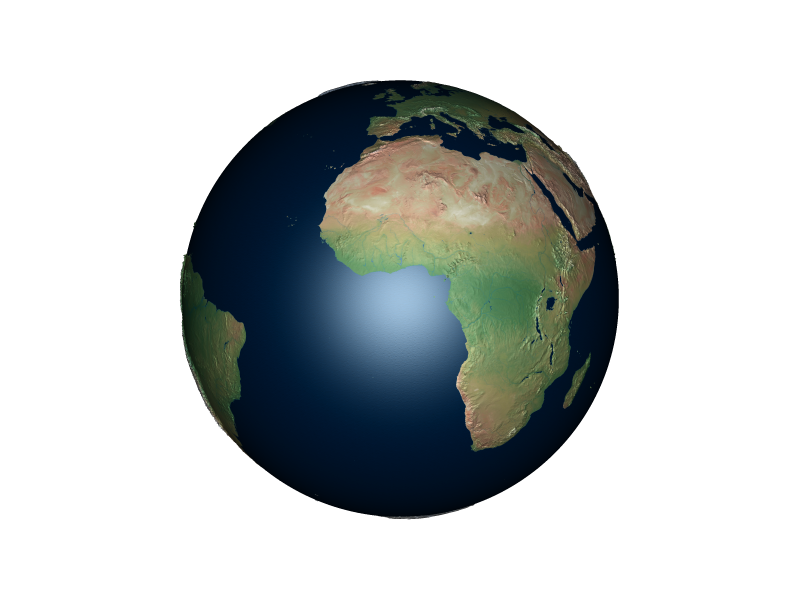

In [19]:
lv.display((800,600))

## Interactive viewer

- interactive() - opens a window on the local machine where code is being run
- window() - opens a view in the notebook

In [ ]:
#This opens a view window inside the notebook
lv.window(resolution=(800,600))

In [ ]:
# Add some controls
lv.control.Range('brightness')
lv.control.Range('contrast')
lv.control.Range('saturation')
lv.control.Range(command='background', range=(0,1), step=0.1, value=1)
lv.control.show()

## Simple Video output

TODO: document args to lv.video here etc

In [ ]:
from tqdm.notebook import tqdm

#Reset view
lv.reset()
lv.translation(0, 0, -17.5)
lv.rotation(0.0, -125.0, 0.0) #Rotate to Australia

frames = 90
with lv.video(filename='earth_rotating.mp4', quality=3, resolution=(1024,1024), width=512, height=512, params="autoplay") as v:    
    for d in tqdm(range(0,frames,1), desc='', miniters=1):
        lv.rotate('y', 1)
        lv.render()

    #Final frames - necessary or video playback is cut short
    for i in range(40):
        lv.render()